# Model for predicting the amount of pure gold extracted from gold ore

## Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


## Conhecendo os dados

In [2]:
# Reading the csv files
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')

### Dataframe completo

In [3]:
# Printing the first 5 rows of the dataframe
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
# Printing information about the dataframe
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [5]:
# Numbers of rows and columns
data_full.shape

(22716, 87)

In [6]:
# Looking for missing data
data_full.isna().mean()

date                                          0.000000
final.output.concentrate_ag                   0.003918
final.output.concentrate_pb                   0.003830
final.output.concentrate_sol                  0.016948
final.output.concentrate_au                   0.003786
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.004446
secondary_cleaner.state.floatbank5_b_air      0.004446
secondary_cleaner.state.floatbank5_b_level    0.004402
secondary_cleaner.state.floatbank6_a_air      0.005239
secondary_cleaner.state.floatbank6_a_level    0.004446
Length: 87, dtype: float64

In [7]:
# Looking for duplicated rows
data_full.duplicated().mean()

0.0

### Dataframe de teste

In [8]:
# Printing the first 5 rows of the dataframe
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [9]:
# Printing information about the dataframe
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [10]:
# Number of rows and columns 
data_test.shape

(5856, 53)

In [11]:
# Looking for missing data
data_test.isna().mean()

date                                          0.000000
primary_cleaner.input.sulfate                 0.051571
primary_cleaner.input.depressant              0.048497
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.028347
primary_cleaner.state.floatbank8_a_air        0.002732
primary_cleaner.state.floatbank8_a_level      0.002732
primary_cleaner.state.floatbank8_b_air        0.002732
primary_cleaner.state.floatbank8_b_level      0.002732
primary_cleaner.state.floatbank8_c_air        0.002732
primary_cleaner.state.floatbank8_c_level      0.002732
primary_cleaner.state.floatbank8_d_air        0.002732
primary_cleaner.state.floatbank8_d_level      0.002732
rougher.input.feed_ag                         0.002732
rougher.input.feed_pb                         0.002732
rougher.input.feed_rate                       0.006831
rougher.input.feed_size                       0.003757
rougher.input.feed_sol                        0.011441
rougher.in

In [12]:
# Looking for duplicated rows
data_test.duplicated().mean()

0.0

### Dataframe de treinamento

In [13]:
# Printing the first 5 rows of the dataframe
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [14]:
# Printing information about the dataframe
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [15]:
# Numbers of rows and columns
data_train.shape

(16860, 87)

In [16]:
# Looking for missing values
data_train.isna().mean()

date                                          0.000000
final.output.concentrate_ag                   0.004270
final.output.concentrate_pb                   0.004270
final.output.concentrate_sol                  0.021945
final.output.concentrate_au                   0.004211
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.005042
secondary_cleaner.state.floatbank5_b_air      0.005042
secondary_cleaner.state.floatbank5_b_level    0.004982
secondary_cleaner.state.floatbank6_a_air      0.006109
secondary_cleaner.state.floatbank6_a_level    0.005042
Length: 87, dtype: float64

In [17]:
# Looking for duplicated rows
data_train.duplicated().mean()

0.0

**Conclusões sobre a etapa e próximos passos:**

* Todos os dataframes possuem valores faltantes, exceto para a coluna de datas.
* A coluna de datas está com tipo string(object)
* O dataframe de teste tem menos colunas (53) do que os demais dataframes.
* Não há valores duplicados.
* Para a próxima etapa irei:
    * Mudar a tipagem da coluna <em>'date'</em>
    * Preencher os valores faltantes com a mediana que não sofrem efeito de valores extremos.
    * Investigar as colunas que não estão presentes no dataframe de teste.

## Pré-processamento dos dados

### Corrigindo tipagem

In [18]:
# Passing the 'date' column to DateTime type
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y/%m/%d')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y/%m/%d')
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y/%m/%d')

### Corrigindo valores ausentes

In [19]:
# This function will fill in the missing values with the median
def fill_with_median(df):
    cols = []
    for col in df:
        if df[col].isnull().any():
            cols.append(col)

    for col in cols:
        median = df[col].median()
        df[col].fillna(median, inplace=True)
    return df


In [20]:
data_full = fill_with_median(data_full)
data_test = fill_with_median(data_test)
data_train = fill_with_median(data_train)

In [21]:
print(data_full.isna().mean().sum())
print(data_test.isna().mean().sum())
print(data_train.isna().mean().sum())

0.0
0.0
0.0


## Análise Explóratória

### Checando calculo de retirada (rougher.output.recovery)

Verificando se a quantidade retirada foi calculada corretamente. Através do conjunto de treinamento, calculei a quantidade retirada para a feature rougher.output.recovery. Usei o EAM como métrica.

In [22]:
# Checking the withdrawal amount calculation in data_train['rougher.output.recovery']
eps = 1e-9
C = data_train['rougher.output.concentrate_au'] / (data_train['final.output.concentrate_au'] + eps)
F = data_train['rougher.input.feed_au'] / (data_train['rougher.output.concentrate_au'] + eps)
T = data_train['rougher.output.tail_au'] / (data_train['final.output.concentrate_au'] + eps)

data_train['withdrawal_amount'] = C * (F - T) / ((F * (C - T)) + eps) * 100


eam = mean_absolute_error(data_train['withdrawal_amount'], data_train['rougher.output.recovery'])

print(f'The Mean Absolut Error is: {eam}')

The Mean Absolut Error is: 7.803390878174006e+26


### Analizando o conjunto de teste sobre colunas ausentes

In [23]:
# Analyzing features not available in the test set

missing_cols = []
count_cols = 0

for col in data_train.columns:
    if col not in data_test.columns and col in data_full.columns:
        missing_cols.append(col)
        count_cols += 1
        
print("Missing columns in test data:", missing_cols)
print("Total of missing columns in test data:", count_cols)

Missing columns in test data: ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.

O dataset de teste não possui as seguintes features:

* **Informações sobre concentrado final:**
    * <em>'final.output.concentrate_ag'</em> 
    * <em>'final.output.concentrate_pb' 
    * <em>'final.output.concentrate_sol'</em> 
    * <em>'final.output.concentrate_au'</em> 
    * <em>'final.output.recovery'</em> 
    * <em>'final.output.tail_ag'</em> 
    * <em>'final.output.tail_pb'</em> 
    * <em>'final.output.tail_sol'</em> 
    * <em>'final.output.tail_au'</em> 

* **Informações sobre as etapas de purificação**
    * <em>'primary_cleaner.output.concentrate_ag'</em> 
    * <em>'primary_cleaner.output.concentrate_pb'</em> 
    * <em>'primary_cleaner.output.concentrate_sol'</em> 
    * <em>'primary_cleaner.output.concentrate_au'</em> 
    * <em>'primary_cleaner.output.tail_ag'</em> 
    * <em>'primary_cleaner.output.tail_pb'</em> 
    * <em>'primary_cleaner.output.tail_sol'</em> 
    * <em>'primary_cleaner.output.tail_au'</em> 
    * <em>'secondary_cleaner.output.tail_ag'</em> 
    * <em>'secondary_cleaner.output.tail_pb'</em> 
    * <em>'secondary_cleaner.output.tail_sol'</em> 
    * <em>'secondary_cleaner.output.tail_au' </em>


* **Informações sobre estapa de flotação**
    * <em>'rougher.calculation.sulfate_to_au_concentrate'</em> 
    * <em>'rougher.calculation.floatbank10_sulfate_to_au_feed'</em> 
    * <em>'rougher.calculation.floatbank11_sulfate_to_au_feed'</em> 
    * <em>'rougher.calculation.au_pb_ratio'</em> 
    * <em>'rougher.output.concentrate_ag'</em> 
    * <em>'rougher.output.concentrate_pb'</em> 
    * <em>'rougher.output.concentrate_sol'</em> 
    * <em>'rougher.output.concentrate_au'</em> 
    * <em>'rougher.output.recovery'</em> 
    * <em>'rougher.output.tail_ag'</em> 
    * <em>'rougher.output.tail_pb'</em> 
    * <em>'rougher.output.tail_sol'</em> 
    * <em>'rougher.output.tail_au'</em> 


### Analisando dados sobre as etapas de processamento do ouro

#### Observando a concentração de metais (Au, Ag, Pb) em cada estágio de purificação.

In [24]:
# Calculate means
primary_cleaner_au_mean = data_train['primary_cleaner.output.tail_au'].mean()
secondary_cleaner_au_mean = data_train['secondary_cleaner.output.tail_au'].mean()
primary_cleaner_ag_mean = data_train['primary_cleaner.output.tail_ag'].mean()
secondary_cleaner_ag_mean = data_train['secondary_cleaner.output.tail_ag'].mean()
primary_cleaner_pb_mean = data_train['primary_cleaner.output.tail_pb'].mean()
secondary_cleaner_pb_mean = data_train['secondary_cleaner.output.tail_pb'].mean()

In [25]:
# Create DataFrame
data = {'stage': ['primary_cleaner', 'secondary_cleaner'],
        'au': [primary_cleaner_au_mean, secondary_cleaner_au_mean],
        'ag': [primary_cleaner_ag_mean, secondary_cleaner_ag_mean],
        'pb': [primary_cleaner_pb_mean, secondary_cleaner_pb_mean]}
df = pd.DataFrame(data)
df.set_index('stage', inplace=True)
df.reset_index(inplace=True)

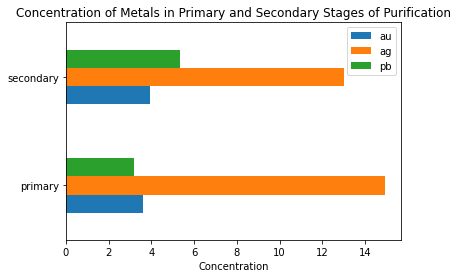

In [26]:
# Create bar charts
names = ['primary', 'secondary']
ax = df.plot(kind='barh',)
ax.set_xlabel('Concentration')
ax.set_yticklabels(names)
ax.set_title('Concentration of Metals in Primary and Secondary Stages of Purification')
plt.show()

#### Comparando as distribuições do tamanho de partícula de minério no conjunto de treinamento e no conjunto de teste.

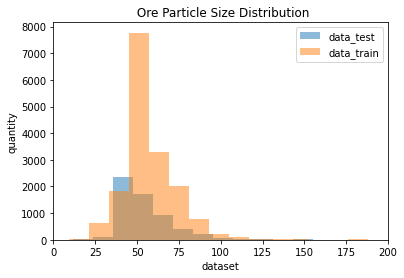

In [27]:
# Ore size distribution histogram
plt.hist(data_test['rougher.input.feed_size'], alpha=0.5, bins=40)
plt.hist(data_train['rougher.input.feed_size'], alpha=0.5, bins=40)
plt.title(' Ore Particle Size Distribution')
plt.xlim(0,200)
plt.xlabel('dataset')
plt.ylabel('quantity')
plt.legend(['data_test', 'data_train'])
plt.show()

#### Distribuição das concentrações totais de todas as substâncias em diferentes estágios: minério bruto, concentrado bruto e concentrado final

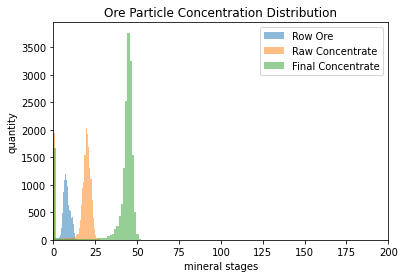

In [28]:
# Plotting histogram to compare the 3-stage gold concentration distributions
plt.hist(data_train['rougher.input.feed_au'], alpha=0.5, bins=40)
plt.hist(data_train['rougher.output.concentrate_au'], alpha=0.5, bins=40)
plt.hist(data_train['final.output.concentrate_au'], alpha=0.5, bins=40)
plt.title('Ore Particle Concentration Distribution')
plt.xlim(0,200)
plt.xlabel('mineral stages')
plt.ylabel('quantity')
plt.legend(['Row Ore', 'Raw Concentrate', 'Final Concentrate'])
plt.show()

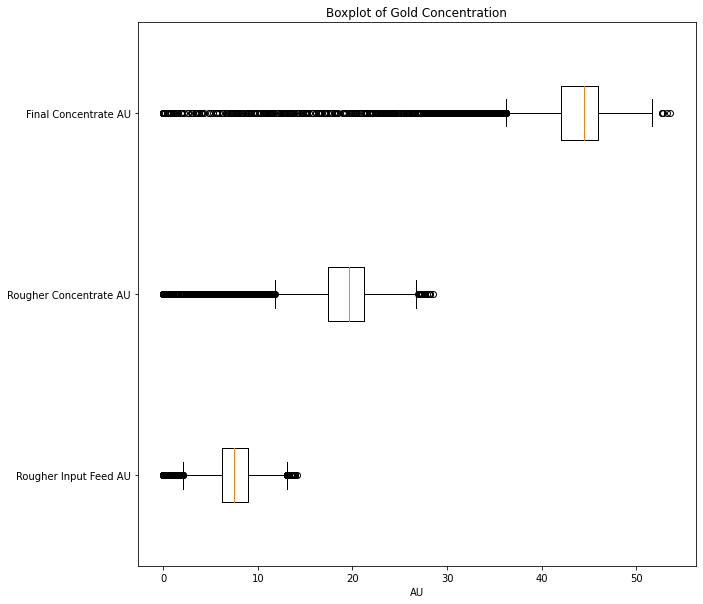

In [29]:
# Plotting boxplot to visualize outliers and other strange values
fig, ax = plt.subplots(figsize=(10, 10))
data = [
    data_train['rougher.input.feed_au'],
    data_train['rougher.output.concentrate_au'],
    data_train['final.output.concentrate_au']
]
labels = ['Rougher Input Feed AU', 'Rougher Concentrate AU', 'Final Concentrate AU']
ax.boxplot(data, vert=False)
ax.set_yticklabels(labels)
ax.set_xlabel('AU')
ax.set_title('Boxplot of Gold Concentration')

plt.show()


In [30]:
def replace_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    for index, value in data[col].items():
        if value < lower_bound or value > upper_bound:
            data.at[index, col] = np.random.normal(loc=(lower_bound if value < lower_bound else upper_bound), scale=1)
    return data[col]

In [31]:
data_train['rougher.input.feed_au'] = replace_outliers(data_train, 'rougher.input.feed_au')
data_train['rougher.output.concentrate_au'] = replace_outliers(data_train, 'rougher.output.concentrate_au')
data_train['final.output.concentrate_au'] = replace_outliers(data_train, 'final.output.concentrate_au')

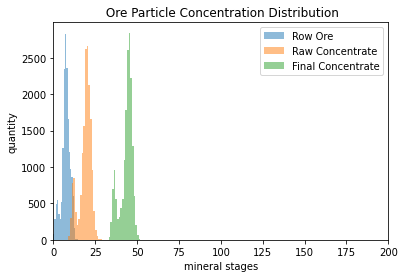

In [32]:
# Checking changes in the chart
plt.hist(data_train['rougher.input.feed_au'], alpha=0.5, bins=20)
plt.hist(data_train['rougher.output.concentrate_au'], alpha=0.5, bins=20)
plt.hist(data_train['final.output.concentrate_au'], alpha=0.5, bins=20)
plt.title(' Ore Particle Concentration Distribution')
plt.xlim(0,200)
plt.xlabel('mineral stages')
plt.ylabel('quantity')
plt.legend(['Row Ore', 'Raw Concentrate', 'Final Concentrate'])
plt.show()

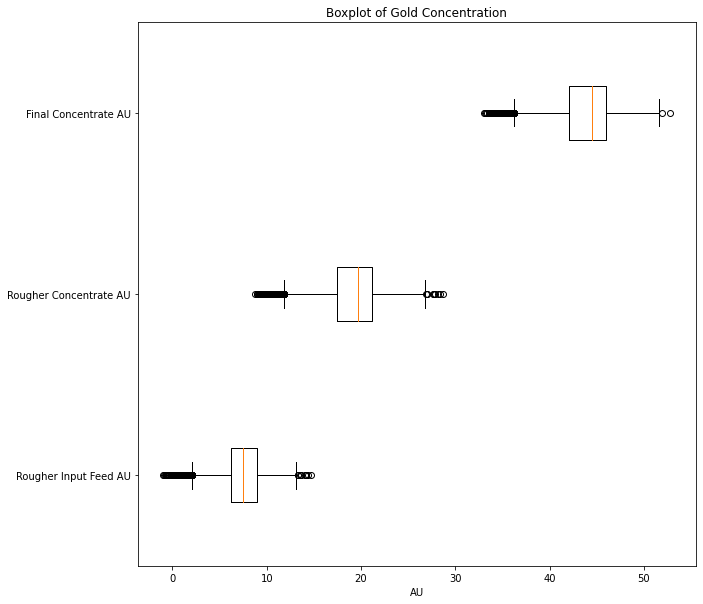

In [33]:
# Checking changes in the chart
fig, ax = plt.subplots(figsize=(10, 10))
data = [
    data_train['rougher.input.feed_au'],
    data_train['rougher.output.concentrate_au'],
    data_train['final.output.concentrate_au']
]
ax.boxplot(data, vert=False)
ax.set_yticklabels(['Rougher Input Feed AU', 'Rougher Concentrate AU', 'Final Concentrate AU'])
ax.set_xlabel('AU')
ax.set_title('Boxplot of Gold Concentration')

plt.show()


**Conclusões sobre a etapa e próximos passos:**

* Pelo valor do erro médio absoluto o cálculo da retirada parece correto;

* Há um total de 34 colunas ausentes no conjunto de teste. Há falta de algumas informações em praticamente todos os processos;

* Nos estágios de purificação as concentrações de todos os metais mudam do primeiro estágio em relação ao segundo. A concentração de Pb tende a aumentar na segunda etapa e de Ag ter uma leve diminuída. A concentração de ouro aumenta um pouco na segunda etapa de purificação;

* Há uma diferença expressiva no conjunto de teste e treinamento na distribuição da partícula do minério e isso pode prejudicar a precisão do modelo;

* Observamos uma grande quantidade de minério bruto e concentrado final com valores próximos a 0. Com gráfico de boxplot foi possível visualizar a quantidade de outliers nas 3 variáveis, sobretudo em relação ao limite inferior, o que explica a distribuição no histograma. Para resolver o problema criei uma função que calcula os limites máximo e mínimo com base em quartis e intervalo interquartis. Com issso os valores fora desses limites foram considerados outliers e substituídos por valores aleatórios aproximados dos limites inferior e superior;
Após esse tratamento, podemos observar que o concentrado de ouro no minério bruto é menor e sobe após flotação e purificação. O que mostra eficiencia no processo. Com boxplot vemos redução de outliers;

* Para os próximos passos irei fazer uma cópia do dataframe completo, para realizar nova divisão dos dados em conjunto de treinamento, validação e teste, uma vez que o conjunto de teste atual mostra agumas limitações.

## Preparando dados para Modelo

### Criando cópia do dataframe completo

In [34]:
# Copying dataframe
data_model = data_full.copy()

In [35]:
# Splitting 'date' column into day, month and year to avoid problems with datetime typing
data_model['day'] = data_model['date'].dt.day
data_model['month'] = data_model['date'].dt.month
data_model['year'] = data_model['date'].dt.year

In [36]:
# Deleting column 'date' in the copy dataframe
data_model.drop('date', axis=1, inplace=True)

In [37]:
# Applying function to discover outliers
data_model['rougher.input.feed_au'] = replace_outliers(data_model, 'rougher.input.feed_au')
data_model['rougher.output.concentrate_au'] = replace_outliers(data_model, 'rougher.output.concentrate_au')
data_model['final.output.concentrate_au'] = replace_outliers(data_model, 'final.output.concentrate_au')

## Construindo o modelo

### Função para calcular o valor de Symmetric mean absolute percentage error (sMAPE)

In [38]:
def sMAPE(target_true, target_pred):
    
    result = np.mean(np.abs(target_true - target_pred) / ((np.abs(target_true) + np.abs(target_pred))/2), axis=0) * 100
    
    return (result[0], result[1])


### Função para calcular o sMAPE Final

In [39]:
def final_sMAPE(train_true, train_pred, test_true, test_pred):
    train_smape = 0.25 * sMAPE(train_true, train_pred)[0] + 0.75 * sMAPE(train_true, train_pred)[1]
    test_smape = 0.25 * sMAPE(test_true, test_pred)[0] + 0.75 * sMAPE(test_true, test_pred)[1]
    final_smape = 0.5 * train_smape + 0.5 * test_smape
    return final_smape

## Treinando diferentes modelos para probelmas de regressão 

### Separando o dataframe em características e objetivos

In [40]:
# Splitting data into features and target
features = data_model.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target = data_model[['rougher.output.recovery', 'final.output.recovery']]

### Aplicando Análise Fatorial de Componente para reduzir o número de variáveis e evitar overfitting

### Dividindo o dataset em conjunto de Treinamento, Validação e Teste

In [41]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.20, random_state=12345)

In [42]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.50, random_state=12345)

In [43]:
# Standardizing the features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

### Treinando modelos e realizando otimização de hiperparâmetros e validação cruzada.

#### Decision Tree Regressor

In [44]:
best_depth = 0
best_smape = (float('inf'), float('inf'))
for depth in range(1,6):
    tree_model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    tree_model.fit(features_train, target_train)
    predicted_valid = tree_model.predict(features_valid)
    smape = sMAPE(target_valid, predicted_valid)
    if smape < best_smape:
        best_smape = smape
        best_depth = depth

print(f'The best model in the validation set has: max_depht= {best_depth} and sMAPE =  actual values : {best_smape[0]}, predicted values: {best_smape[1]}')


The best model in the validation set has: max_depht= 3 and sMAPE =  actual values : 9.70174395421119, predicted values: 10.961225093907483


#### Random Forest Regressor

In [49]:
best_smape = (float('inf'), float('inf'))
best_est = 0
best_depth = 0

for est in range(1, 11):
    for depth in range(1, 6):
        forest_model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        forest_model.fit(features_train, target_train)
        predicted_valid = forest_model.predict(features_valid)
        smape = sMAPE(target_valid, predicted_valid)
        if smape < best_smape:
            best_smape = smape
            best_est = est
            best_depth = depth

print(f"The best model has n_estimators={best_est} and max_depth={best_depth} with sMAPE= actual values : {best_smape[0]}, predicted values: {best_smape[1]}.")


The best model has n_estimators=3 and max_depth=3 with sMAPE= actual values : 9.440730144646954, predicted values: 10.80393343644532.


#### Linear Regression

In [50]:
best_smape = (float('inf'), float('inf'))
best_params = {'fit_intercept': True}

for fit_intercept in [True, False]:
    linear_model = LinearRegression(fit_intercept=fit_intercept)
    linear_model.fit(features_train, target_train)
    predicted_valid = linear_model.predict(features_valid)
    smape = sMAPE(target_valid, predicted_valid)
    if smape < best_smape:
        best_smape = smape
        best_params['fit_intercept'] = fit_intercept

print(f'The best model in the validation set has: sMAPE = actual values : {best_smape[0]}, predicted values: {best_smape[1]}, with the following parameters: {best_params}')


The best model in the validation set has: sMAPE = actual values : 194.6514083884634, predicted values: 198.44250645649083, with the following parameters: {'fit_intercept': True}


**Conclusões da etapa:**

O modelo com melhor resultado para a métrica Erro Percentual Médio Absoluto Simétrico (sMAPE) foi a Regressão de Árvore de Decisão ( 9.70174395421119, 10.961225093907483) e o hiperparâmetro de profundidade igual a 3.

## Avaliando modelo escolhido com conjunto de Teste

In [51]:
tree_model = DecisionTreeRegressor(random_state=12345, max_depth=3)
tree_model.fit(features_train, target_train)
train_predictions = tree_model.predict(features_train)
test_predictions = tree_model.predict(features_test)
smape_train = sMAPE(target_train, train_predictions)
smape_test = sMAPE(target_test, test_predictions)


print(f'The best sMAPE on the tarin set is actual values : {smape_train[0]}, predicted values: {smape_train[1]}')
print(f'The best sMAPE on the test set is actual values : {smape_test[0]}, predicted values: {smape_test[1]}')

The best sMAPE on the tarin set is actual values : 9.885601002276797, predicted values: 10.28572426174867
The best sMAPE on the test set is actual values : 9.586626500042888, predicted values: 9.647372420924553


#### sMAPE final

In [52]:
final_smape = final_sMAPE(target_train, train_predictions, target_test, test_predictions)
print(f'The Mean Absolute Percentage Error (SMAPE) final between the test and train set is {final_smape}')

The Mean Absolute Percentage Error (SMAPE) final between the test and train set is 9.90893969379242


## Conclusões

Para este projeto foi utilizado o modelo de Regressão de Árvore de Decisão para prever a variável de objetivo. A métrica escolhida para avaliar o desempenho do modelo foi o sMAPE , que mede a precisão das previsões em relação aos valores reais. Após treinamento e teste o modelo alcançou uma pontuação de sMAPE de 10%, mostrando boa capacidade em prever a quantidade de ouro puro extraído do minério de ouro. Este resultado sugere que o modelo aprendeu os padrões subjacentes nos dados e pode fazer previsões precisas.